![for sale image, from https://time.com/5835778/selling-home-coronavirus/](https://api.time.com/wp-content/uploads/2020/05/selling-home-coronavirus.jpg?w=800&quality=85)

# Project Title

## Overview

Here is our group's overview which talks about our project goals and stakeholder.


## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

- Who are your stakeholders?
- What are your stakeholders' pain points related to this project?
- Why are your predictions important from a business perspective?

In [7]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [12]:
import sys, os

root_path = os.path.join(os.pardir, os.pardir)
os.path.abspath(root_path)
# sys.path.append(root_path)

'/Users/lberlin/Documents/Flatiron/Projects/HomeSalesAnalysis'

In [11]:
os.path

<module 'posixpath' from '/opt/anaconda3/envs/learn-env/lib/python3.8/posixpath.py'>

In [9]:
root_path

'../..'

In [10]:
sys.path

['/Users/lberlin/Documents/Flatiron/Projects/HomeSalesAnalysis/notebooks/Lindsey',
 '/opt/anaconda3/envs/learn-env/lib/python38.zip',
 '/opt/anaconda3/envs/learn-env/lib/python3.8',
 '/opt/anaconda3/envs/learn-env/lib/python3.8/lib-dynload',
 '',
 '/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages',
 '/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/extensions',
 '/Users/lberlin/.ipython',
 '../..']

In [5]:
# Importing utility functions
import utils as ut
# or
# from utils import evaluate

ModuleNotFoundError: No module named 'utils'

In [ ]:
ut.evaluate()

## Data Understanding

Describe the data being used for this project.

Questions to consider:

- Where did the data come from, and how do they relate to the data analysis questions?
- What do the data represent? Who is in the sample and what variables are included?
- What is the target variable?
- What are the properties of the variables you intend to use?

In [17]:
# Read in the data
df = pd.read_csv('../../data/kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [18]:
# Look at column info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [19]:
# Explore int and float columns
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

Markdown cell explaining what I find interesting from exploring my numeric columns

In [20]:
# Explore object columns
obj_cols = [c for c in df.columns if df[c].dtype == 'object']
df[obj_cols].describe()

date waterfront   view condition      grade sqft_basement
count       21597      19221  21534     21597      21597         21597
unique        372          2      5         5         11           304
top     6/23/2014         NO   NONE   Average  7 Average           0.0
freq          142      19075  19422     14020       8974         12826

Markdown cell explaining what I find interesting from exploring my object columns

In [21]:
# Explore nulls
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Markdown cell discussing strategies I might employ to fill or otherwise clean nulls in these columns

### Train Test Split

In [22]:
# Create X and y
X = df.drop(columns=['id', 'price'])
y = df['price']

In [23]:
# Train test split - reserving 25%
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [24]:
# Exploring the describes across my train and test set to see if they're equivalent
print("X Train:")
display(X_train.describe())
print("X Test:")
display(X_test.describe())

X Train:


bedrooms     bathrooms   sqft_living      sqft_lot        floors  \
count  16197.000000  16197.000000  16197.000000  1.619700e+04  16197.000000   
mean       3.372229      2.116426   2083.693030  1.507189e+04      1.494752   
std        0.905951      0.768049    918.209756  4.077585e+04      0.540474   
min        1.000000      0.500000    370.000000  5.200000e+02      1.000000   
25%        3.000000      1.750000   1430.000000  5.058000e+03      1.000000   
50%        3.000000      2.250000   1912.000000  7.620000e+03      1.500000   
75%        4.000000      2.500000   2560.000000  1.072000e+04      2.000000   
max       11.000000      8.000000  13540.000000  1.651359e+06      3.500000   

         sqft_above      yr_built  yr_renovated       zipcode           lat  \
count  16197.000000  16197.000000  13318.000000  16197.000000  16197.000000   
mean    1790.467926   1971.019942     81.993843  98078.100080     47.560975   
std      827.598600     29.325399    396.213694     53.486457      0.138273   
min      370.000000   1900.000000      0.000000  98001.000000     47.155900   
25%     1200.000000   1952.000000      0.000000  98033.000000     47.472500   
50%     1560.000000   1975.000000      0.000000  98065.000000     47.573300   
75%     2220.000000   1997.000000      0.000000  98117.000000     47.678300   
max     9410.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  16197.000000   16197.000000   16197.000000  
mean    -122.213720    1987.809286   12784.065074  
std        0.141639     685.189105   26833.379871  
min     -122.519000     399.000000     651.000000  
25%     -122.329000    1490.000000    5100.000000  
50%     -122.231000    1840.000000    7620.000000  
75%     -122.124000    2360.000000   10086.000000  
max     -121.315000    6210.000000  871200.000000

X Test:


bedrooms    bathrooms   sqft_living      sqft_lot       floors  \
count  5400.000000  5400.000000   5400.000000  5.400000e+03  5400.000000   
mean      3.376111     2.114028   2070.210185  1.518194e+04     1.492130   
std       0.984894     0.771851    917.805949  4.327026e+04     0.537347   
min       1.000000     0.750000    410.000000  6.090000e+02     1.000000   
25%       3.000000     1.750000   1420.000000  5.001000e+03     1.000000   
50%       3.000000     2.250000   1910.000000  7.616500e+03     1.500000   
75%       4.000000     2.500000   2520.000000  1.058800e+04     2.000000   
max      33.000000     7.750000  10040.000000  1.164794e+06     3.000000   

        sqft_above     yr_built  yr_renovated       zipcode          lat  \
count  5400.000000  5400.000000   4437.000000   5400.000000  5400.000000   
mean   1782.984630  1970.938889     88.568177  98077.507222    47.557447   
std     828.294279    29.526848    410.952944     53.595322     0.139365   
min     410.000000  1900.000000      0.000000  98001.000000    47.162200   
25%    1190.000000  1951.000000      0.000000  98032.000000    47.465725   
50%    1550.000000  1975.000000      0.000000  98065.000000    47.568900   
75%    2200.000000  1997.000000      0.000000  98118.000000    47.677500   
max    8860.000000  2015.000000   2015.000000  98199.000000    47.777500   

              long  sqft_living15     sqft_lot15  
count  5400.000000    5400.000000    5400.000000  
mean   -122.214770    1983.054074   12680.953148  
std       0.137951     685.405621   28558.979278  
min    -122.515000     670.000000     659.000000  
25%    -122.327000    1480.000000    5100.000000  
50%    -122.228000    1830.000000    7619.500000  
75%    -122.127000    2370.000000   10080.000000  
max    -121.315000    5790.000000  858132.000000

Markdown cell discussing what I notice in terms of any red flag differences between train and test set

In [25]:
# Exploring the describes across my train and test set to see if they're equivalent
print("X Train:")
display(X_train[obj_cols].describe())
print("X Test:")
display(X_test[obj_cols].describe())

X Train:


date waterfront   view condition      grade sqft_basement
count       16197      14441  16148     16197      16197         16197
unique        366          2      5         5         11           280
top     4/27/2015         NO   NONE   Average  7 Average           0.0
freq          103      14330  14585     10525       6718          9586

X Test:


date waterfront  view condition      grade sqft_basement
count        5400       4780  5386      5400       5400          5400
unique        337          2     5         5         10           214
top     6/23/2014         NO  NONE   Average  7 Average           0.0
freq           41       4745  4837      3495       2256          3240

### Visual Data Exploration

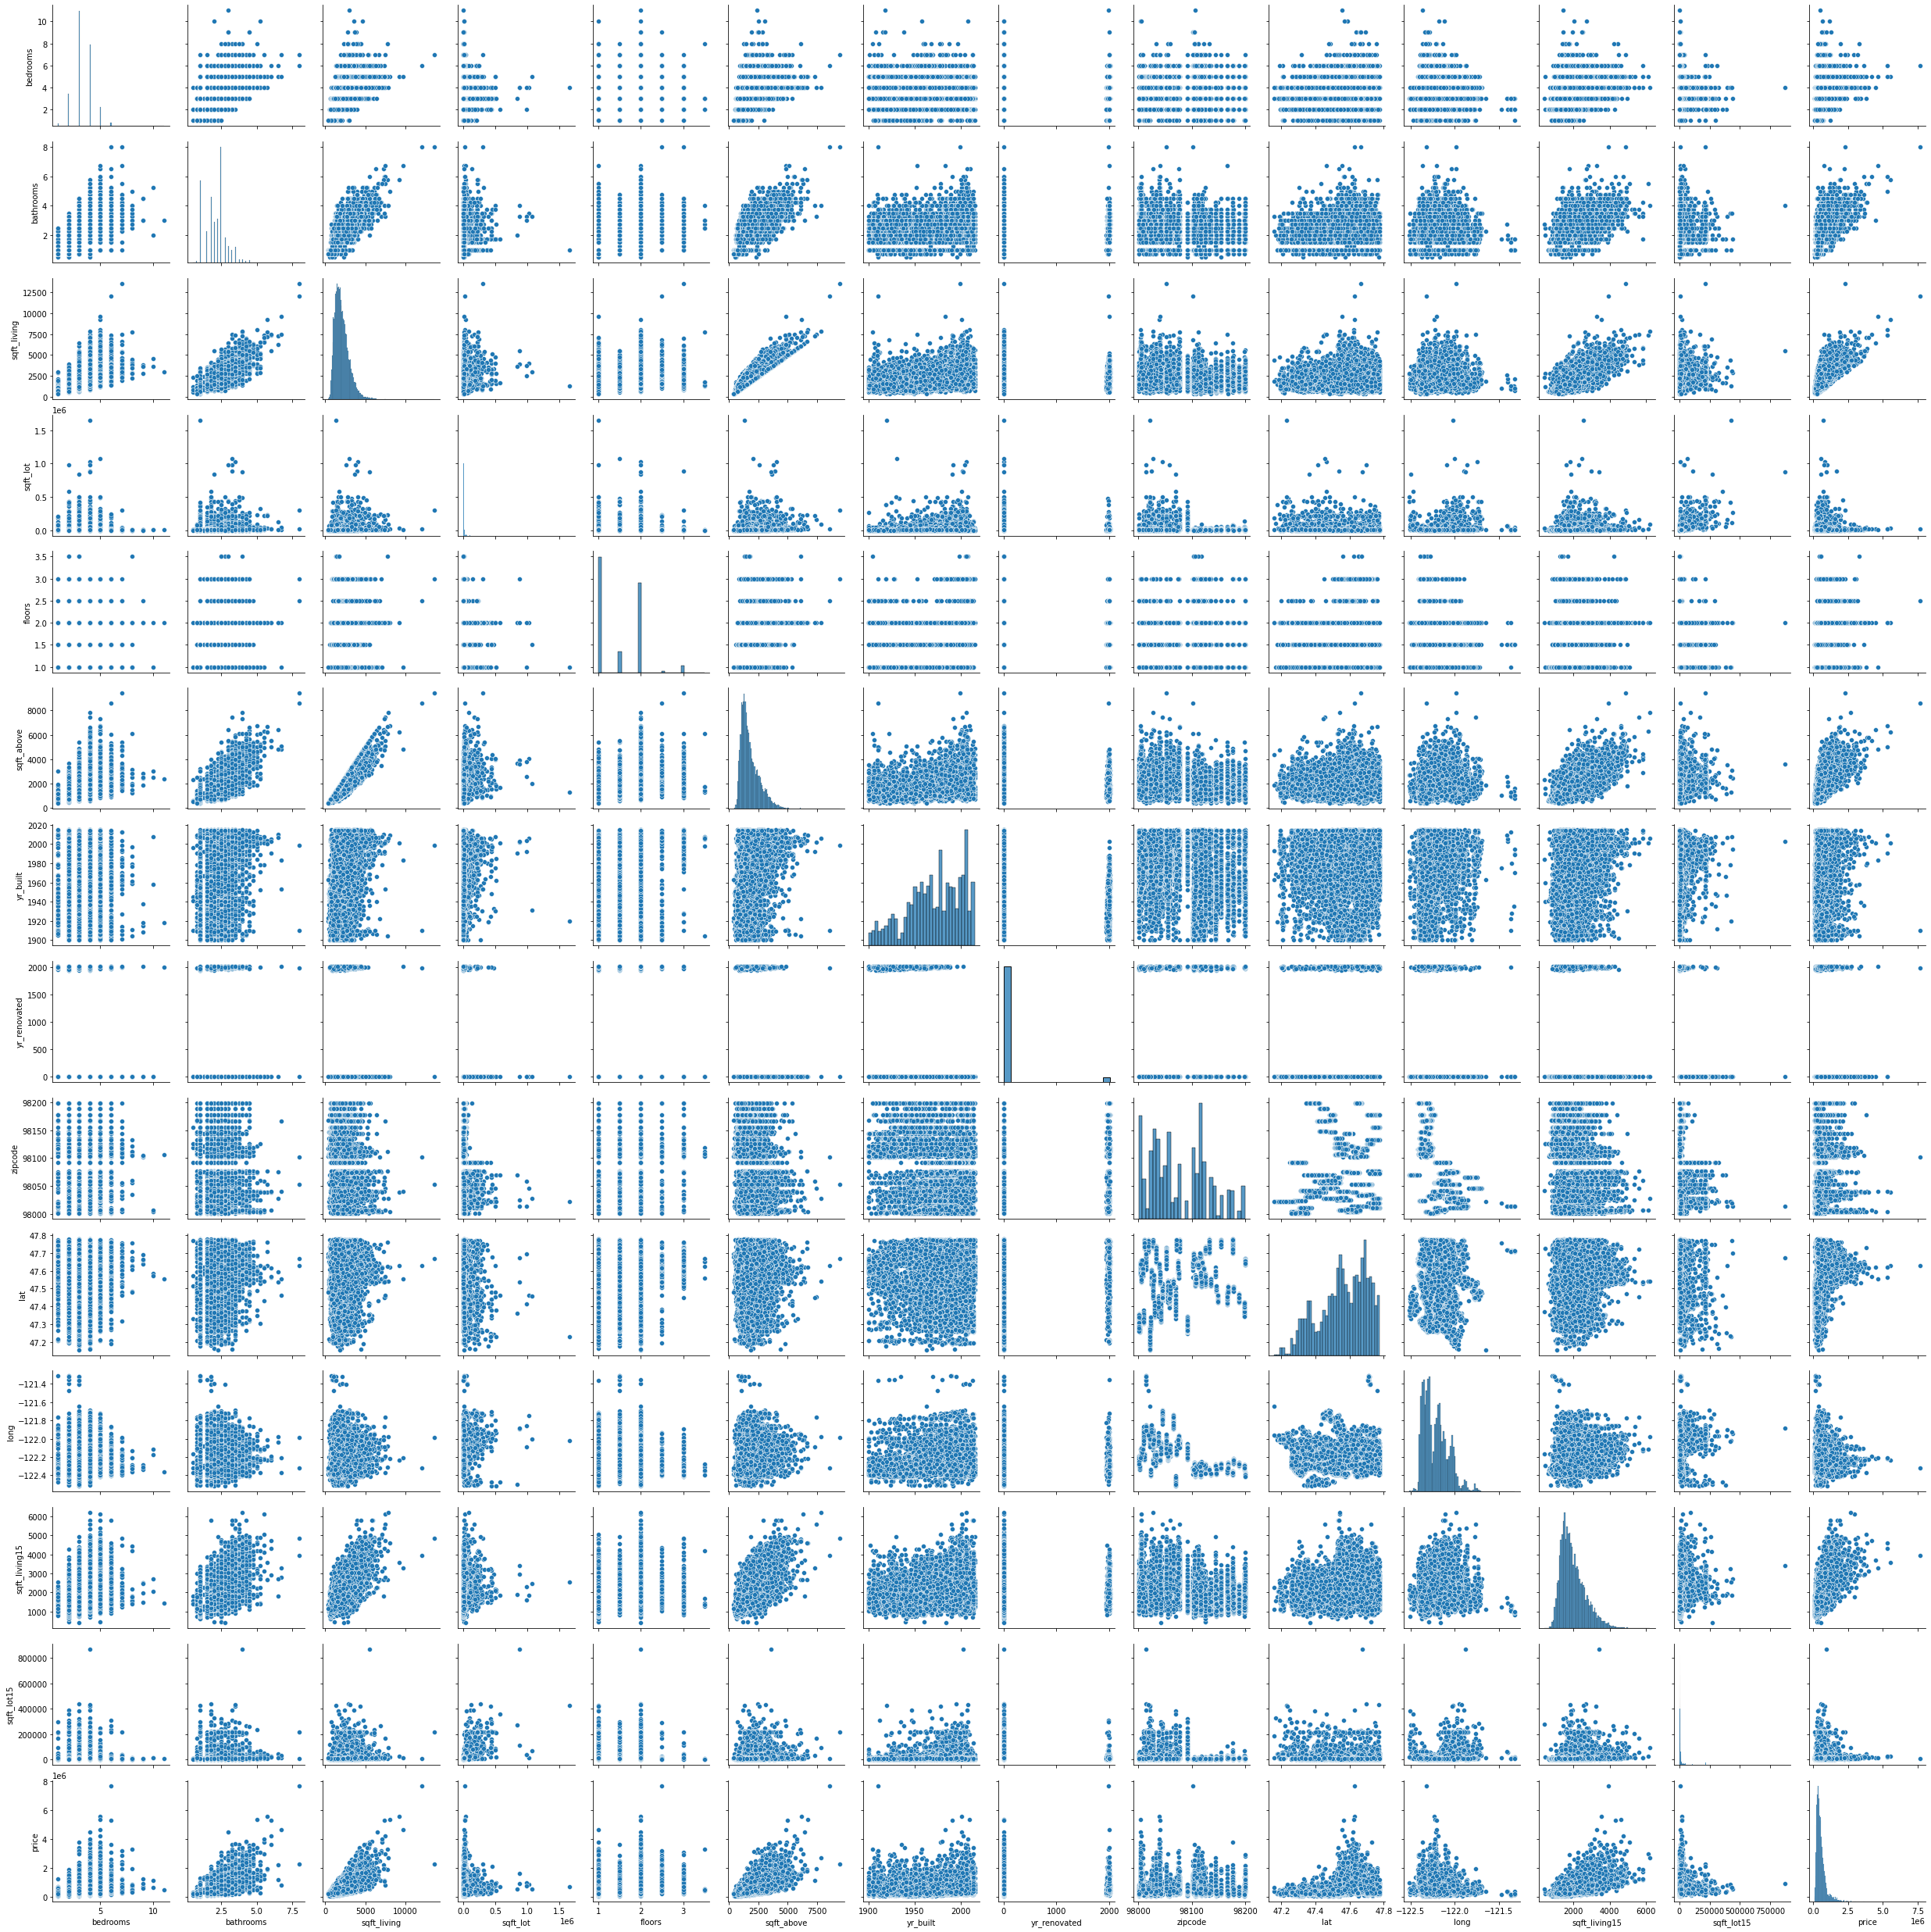

In [26]:
# Create a train df
train_df = pd.concat([X_train, y_train], axis=1)

# Look at a pairplot across my whole dataframe
sns.pairplot(train_df);

Markdown outlining some initial observations for numeric data

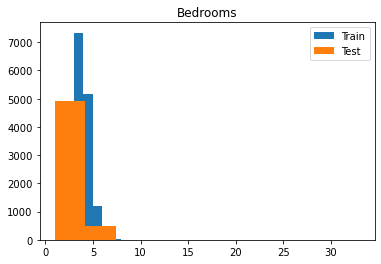

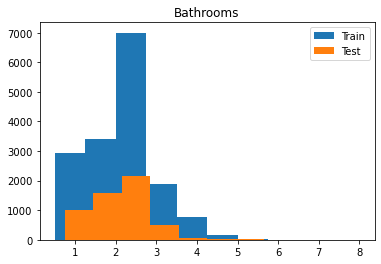

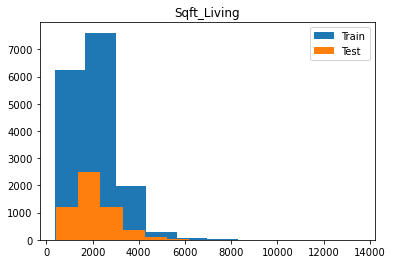

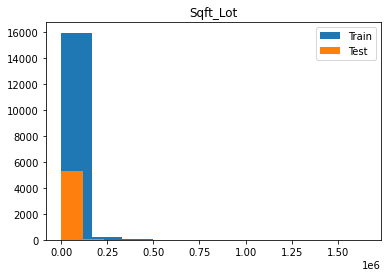

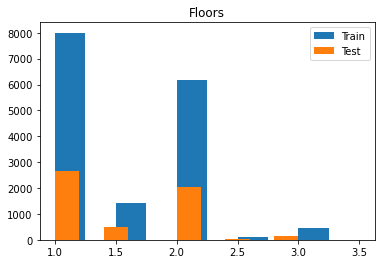

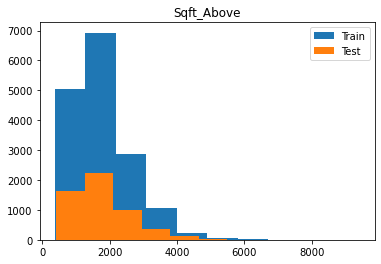

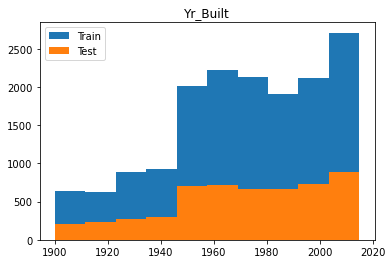

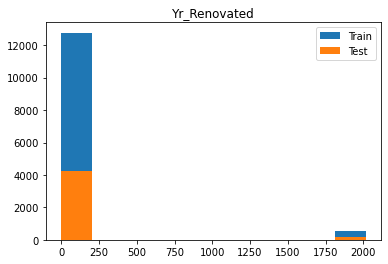

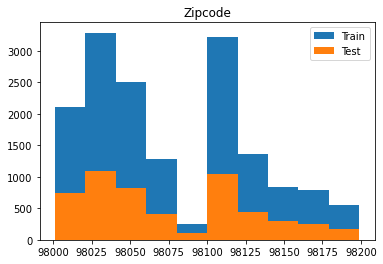

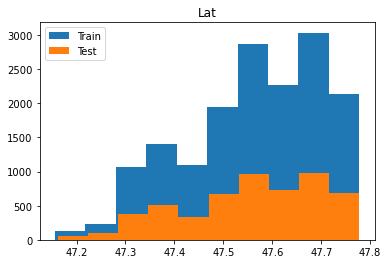

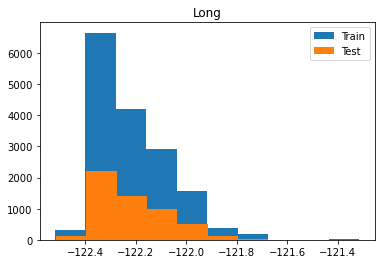

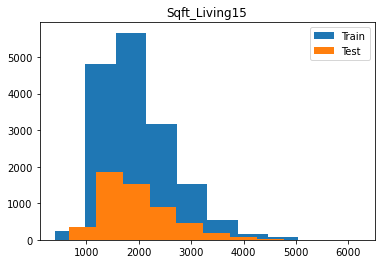

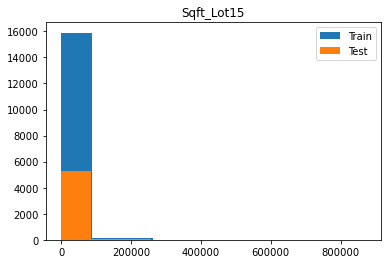

In [27]:
# Exploring distributions across train and test for my X variables
# Not looking at all variables - defining which are useful to explore here
used_cols = [c for c in df.columns if c not in ['price', 'id', *obj_cols]]
# num_cols = [c for c in df.columns if X_train[c].dtype in ['int64', 'float64']]

for col in used_cols:
    plt.hist(X_train[col], label='Train')
    plt.hist(X_test[col], label='Test')
    plt.title(f"{col.title()}")
    plt.legend()
    plt.show()

Markdown explaining what I observe visually in my numeric columns

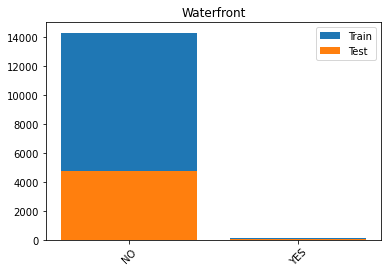

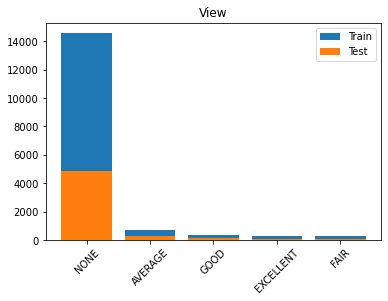

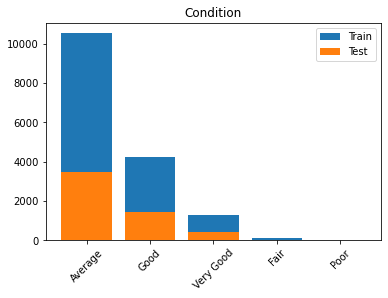

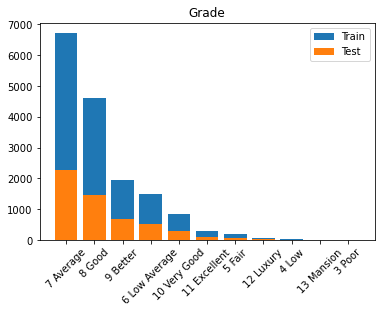

In [28]:
# Exploring bar plots for variables with less than 15 uniques
used_cols = [c for c in obj_cols if df[c].nunique() < 15]

for col in used_cols:
    train_values = X_train[col].value_counts()
    test_values = X_test[col].value_counts()
    plt.bar(train_values.index, train_values, label = 'Train')
    plt.bar(test_values.index, test_values, label = 'Test')
    plt.title(f"{col.title()}")
    plt.xticks(rotation = 45)
    plt.legend()
    plt.show()

Markdown explaining what I observe visually in my categorical columns

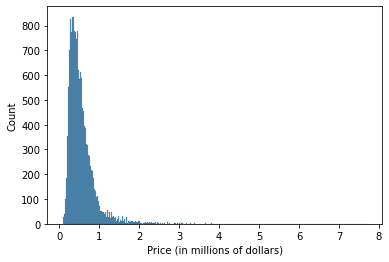

In [29]:
# Do want to explore my target
sns.histplot(y_train/1000000)
plt.xlabel('Price (in millions of dollars)');

Markdown explaining what I observe about my target

In [82]:
# Explore relationship between location and price

fig = px.scatter_mapbox(data_frame = train_df, # df name
                        lat='lat', # name of latitude columns
                        lon='long', # name of longitude column
                        color='price', # name of column to use for the color
                        zoom=8)
fig.update_layout(mapbox_style="open-street-map")

fig.show()

Markdown explaining the patterns I see on the map

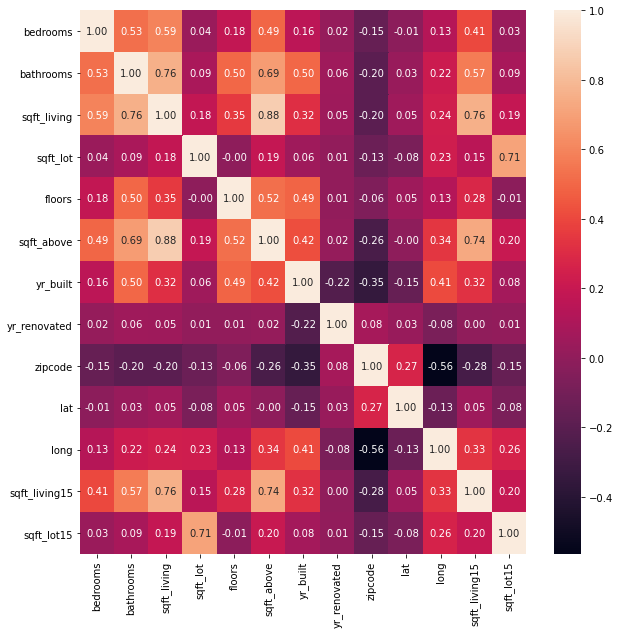

In [30]:
# Explore a heatmap of correlations across my whole dataframe
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f');

Markdown explaining what I've noticed about correlations among X variables (multicollinearity!)

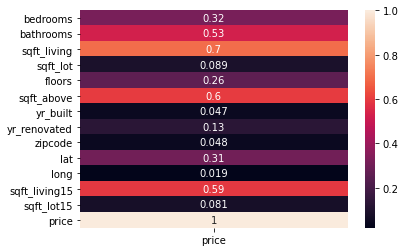

In [31]:
# Explicitly exploring absolute value correlations with price
sns.heatmap(abs(train_df.corr())[['price']], annot=True);

Markdown explaining the relationships I'm seeing between my X and y variables in my training data

## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

- Were there variables you dropped or created?
- How did you address missing values or outliers?
- Why are these choices appropriate given the data and the business problem?

In [ ]:
# code here for data preparation

## Modeling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

- How did you analyze the data to arrive at an initial approach?
- How did you iterate on your initial approach to make it better?
- Why are these choices appropriate given the data and the business problem?

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

Evaluate how well your work solves the stated business problem. 

Questions to consider:

- How do you interpret the results?
- How well does your model fit your data? How much better is this than your baseline model? Is it over or under fit?
- How well does your model/data fit any modeling assumptions?

For the final model, you might also consider:

- How confident are you that your results would generalize beyond the data you have?
- How confident are you that this model would benefit the business if put into use?

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [ ]:
# code here to arrive at a baseline prediction

In [34]:
train_target_mean = y_train.mean()
train_target_mean

541284.4615669568

In [36]:
# Get my predictions - lists the length of my train and test sets, all of the mean y from train data
baseline_train_preds = [train_target_mean] * len(y_train)

baseline_test_preds = [train_target_mean] * len(y_test)

In [40]:
len(baseline_train_preds) == len(y_train)

True

In [41]:
print(f"Train R2: {r2_score(y_train, baseline_train_preds)}")
print(f"Test R2: {r2_score(y_test, baseline_test_preds)}")
print("****")
print(f"Train RMSE: {mean_squared_error(y_train, baseline_train_preds, squared=False)}")
print(f"Test RMSE: {mean_squared_error(y_test, baseline_test_preds, squared=False)}")

Train R2: 0.0
Test R2: -0.0001137788699303588
****
Train RMSE: 366333.4407520335
Test RMSE: 370425.86427991075


### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [6]:
# code here for your first 'substandard' model

fsm_X_train = X_train['sqft_living']
fsm_X_test = X_test['sqft_living']

In [7]:
# code here to evaluate your first 'substandard' model
fsm = sm.OLS(y_train, sm.add_constant(fsm_X_train)).fit()

In [8]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 1.559e+04
Date:                Mon, 04 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:57:31   Log-Likelihood:            -2.2503e+05
No. Observations:               16197   AIC:                         4.501e+05
Df Residuals:                   16195   BIC:                         4.501e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.099e+04   5095.343     -8.044      0.000    -5.1e+04    -3.1e+04
sqft_living   279.4423      2.238    124.878      0.000     275.056     283.828
==============================================================================
Omnibus:                    10430.239   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           291279.150
Skew:                           2.656   Prob(JB):                         0.00
Kurtosis:                      23.084   Cond. No.                     5.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
fsm_train_preds = fsm.predict(sm.add_constant(fsm_X_train))
fsm_test_preds = fsm.predict(sm.add_constant(fsm_X_test))

In [49]:
print(f"Train R2: {r2_score(y_train, fsm_train_preds)}")
print(f"Test R2: {r2_score(y_test, fsm_test_preds)}")
print("****")
print(f"Train RMSE: {mean_squared_error(y_train, fsm_train_preds, squared=False)}")
print(f"Test RMSE: {mean_squared_error(y_test, fsm_test_preds, squared=False)}")

Train R2: 0.49055555791820304
Test R2: 0.4988509662233589
****
Train RMSE: 261471.87387302093
Test RMSE: 262216.5180747793


Train R2: 0.4906
Test R2: 0.4989
****
Train RMSE: $261,471.87
Test RMSE: $262,216.52
****
Train MAE: $174,170.69
Test MAE: $171,964.83


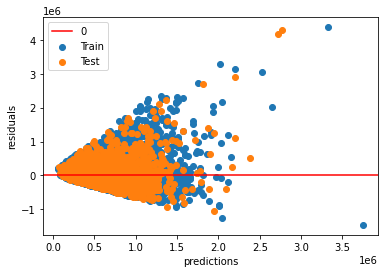

In [10]:
evaluate(y_train, fsm_train_preds, y_test, fsm_test_preds)

### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [ ]:
# code here to iteratively improve your models

In [ ]:
# code here to evaluate your iterations

### 'Final' Model

In the end, you'll arrive at a 'final' model - aka the one you'll use to make your recommendations/conclusions. This likely blends any group work. It might not be the one with the highest scores, but instead might be considered 'final' or 'best' for other reasons.

In [ ]:
# code here to show your final model

In [ ]:
# code here to evaluate your final model

## Conclusions

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project (future work)?
